# Recap

**Q1:** What is the three rules of broadcasting?

1. `A`, `B` are two arrays, and `B` has smaller dimension. We will try to **pad**, or **extend** `B` by 1 on the *left* so that the number of dimensions of `B` and `A` will match

2. For each dimension, if this particular dimension does not match, and one of them is 1, then we **stretch** the smaller array to match the bigger one until this dimension matches

3. If this particular dimension does not match, and none of the dimension is one, raise error

In [ ]:
import numpy as np
M = np.ones((3,2,2))
M.shape

a = np.array([1,2])
a.shape

M + a

**Q2:** What is the expected result from the following operation?

In [ ]:
x = np.arange(1,10)[:, np.newaxis]
y = np.arange(1,10)

x * y

# Broadcasting Applications

## Centering an array 

In [ ]:
X = np.random.random((10,3))

In [ ]:
X

In [ ]:
Xmean = X.mean(0) 
Xmean 

In [ ]:
X_centered = X - Xmean 

In [ ]:
X_centered

In [ ]:
X_centered.mean(0)

## Aside: Using np.newaxis to reshape / create new dimension

In [ ]:
x = np.array([1,2,3])
x.reshape((1,3))

In [ ]:
x[np.newaxis, :]

In [ ]:
x.reshape((3,1))

In [ ]:
x[:,np.newaxis]

## Plotting 2d function

In [ ]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:,np.newaxis]

In [ ]:
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [ ]:
z.shape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(z, origin='lower', extent=[0,5,0,5], cmap='viridis')
plt.colorbar()

# Example: Counting Rainy Days

This section uses Boolean masks to examine and manipulate values within Numpy arrays. Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion.

In [1]:
import numpy as np
import pandas as pd

In [2]:
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0 # 1/10 mm -> inches
inches.shape


(365,)

In [ ]:
inches

In [ ]:
2.56 * inches

In [ ]:
inches.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [ ]:
plt.hist(inches,40)

This gives us some general ideas. However, this does not convey some information we would like to see: How many rainy days where there in the year? what is the average precipitation on those rainy days? how many days were there with more than half an inch of rain? 

Looping through the data? 

# Comparison Operators as ufuncs

In [ ]:
x = np.arange(1,6)

In [ ]:
x

In [ ]:
x < 3

In [ ]:
x > 3

In [ ]:
x <= 3

In [ ]:
x >= 3

In [ ]:
x != 3

In [ ]:
x == 3

ALso possible to do element-wise comparison of two arrays, and to include compound expression:

In [ ]:
(2 * x) == (x ** 2)

In [ ]:
2 * x

In [ ]:
x ** 2

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write `x < 3`, internally NumPy uses `np.less(x, 3)`. A summary of the comparison operators and their equivalent ufunc is shown here:

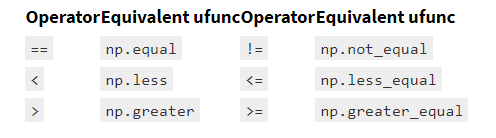

In [ ]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x

In [ ]:
y = np.array([5,6,5]).reshape((3,1))

In [ ]:
y

In [ ]:
x < y

# Outer Product

In [ ]:
x = np.arange(1,10).reshape((9,1))
y = np.arange(1,10).reshape((1,9))

x + y

# Working with Boolean Arrays

In [ ]:
print(x)

## Counting entries

In [ ]:
# How many values are less than 6?
np.count_nonzero(x<6)

In [ ]:
# another way of doing this:
np.sum(x < 6)

In [ ]:
# we can also select according to certain criteria by using masking 
y = x[x < 6]

In [ ]:
y

In [ ]:
y[0] = 99

In [ ]:
x

In [ ]:
y

**Question:** Write a line of code to find out how many values are less than 6 in each row? 

In [ ]:
np.sum(x<6, axis=1)


In [ ]:
x[x<6]

In [ ]:
z = np.ones((3,5))
z.sum(axis=0)

Checking if any or all the values are true, we can use `np.any` or `np.all`

In [ ]:
x

In [ ]:
np.any(x > 8)

In [ ]:
np.any(x < 0)

In [ ]:
np.all(x < 10)

In [ ]:
np.all(x == 6)

And, to use `np.any` and `np.all` along particular axes,

In [ ]:
np.all(x < 8, axis = 1)

**Remark:** Python has its own `sum`, `any`, and `all`. Remember to use the numpy version! 

## Boolean Operation

In [ ]:
inches[inches > 0].shape

In [ ]:
# how to find days with rain less than 1 inches and greater than 0.5 inch? 
np.sum((inches > 0.5) & (inches < 1)) 

In [ ]:
inches[(inches > 0.5) & (inches < 1)]

In [ ]:
A = inches > 0.5
B = inches < 1

In [ ]:
A & B 

In [ ]:
B

**Remark:** The parantheses here are important because of operator precedence rules. With parantheses removed this expression would be evaluated as follows

In [ ]:
# precedence rule 
inches > (0.5 & inches) < 1

In [ ]:
# just to make things more complicated, we can also calculate the above as the following:
np.sum(~((inches <= 0.5) | (inches >= 1)))

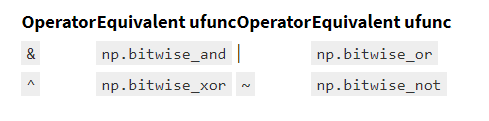

**Question:** Find out how many days of rains whose precipitation is between 1 to 1.5

# Boolean Arrays as Masks

In [ ]:
mask = x < 5
print(mask)

Using this mask, we can index on this Boolean array. This is known as a *masking* operation

In [ ]:
x[mask]

Once we selected data using our mask, we can then operate on them.

In [4]:
rainy = (inches > 0) # Boolean array

# construct a mask of all summer days
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


**Question:** Compare the median and mean precip and mean of summer and winter.   
*hint:* Winter starts on Dec 12nd, which is the 355 days of the year. End of winter is the 79th day of the year.

In [11]:
winter = (days <79) | (days > 355)
print (np.median(inches[winter & rainy]))
print (np.median(inches[summer & rainy]))
print (np.mean(inches[winter & rainy]))
print (np.mean(inches[summer & rainy]))


0.20866141732283464
0.0610236220472441
0.36930677782924193
0.2066929133858267


# Aside: Using the keywords and/or vs Operators & | 

Short answer: `and` and `or` guage the truth or falsehood of *entire object*, while `&` and `|` refer to bits within each object

In [12]:
bool(42 and 0)

False

In [13]:
bool(42 or 0)

True

When you use `&` and `|` on integers, the expression operates on the bits of the element, applying the *and* or the *or* to the individual bits making up the number:

In [14]:
bin(42) 

'0b101010'

In [15]:
bin(59)

'0b111011'

In [20]:
42 & 59 

67

In [22]:
42 | 59

59

In [23]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [24]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
x = np.arange(10)
(x > 4) & (x < 8)

So remember this: `and` and `or` perform a single Boolean evaluation on an entire object, while `&` and `|` perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object. For Boolean NumPy arrays, the latter is nearly always the desired operation.